## Self Normalizing Nets

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.rcParams['savefig.dpi'] = 100

out_dir = 'C:/Users/GAO/Jupyter/data/'

In [9]:
# create 1000 data points from a gaussian distribution
data = np.random.randn(1000, 500)

# 10 hidden layers
hidden_layer_sizes = [500]*10

# define nonlinearities
nonlinearities = ['selu']*len(hidden_layer_sizes)

In [10]:
def selu(x):
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    return scale*np.where(x>=0.0, x, alpha*np.exp(x)-alpha)

def relu(x):
    return np.maximum(0, x)

def elu(x):
    return np.where(x>=0.0, x, np.exp(x)-1)

act = {'relu': lambda x: relu(x), 
       'elu': lambda x: elu(x), 
       'selu': lambda x: selu(x)}

In [11]:
num_layers = len(hidden_layer_sizes)

stats = {}
for i in range(num_layers):
    # input layer
    X = data if i == 0 else stats[i-1]
    
    # initialize weights
    fan_in, fan_out = X.shape[1], hidden_layer_sizes[i]
    if nonlinearities[i] == 'selu':
        W = np.random.normal(size=(fan_in, fan_out), scale=np.sqrt(1/fan_in))
    else: # he et. al initialization
        W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in / 2)
    
    # matrix multiply with nonlinearity
    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    
    # store result of layer
    stats[i] = H

In [12]:
# mean and std for each layer
layer_means = [np.mean(s) for i,s in stats.items()]
layer_stds = [np.std(s) for i,s in stats.items()]

print('Input layer has mean {} and std {}'.format(np.mean(data), np.std(data)))
for i,s in stats.items():
    print('Hidden layer {} has mean {} and std {}'.format(i+1, layer_means[i], layer_stds[i]))

Input layer has mean 0.000105305542162603 and std 1.0000619436301503
Hidden layer 1 has mean 0.0025308823211866766 and std 0.9994706536430217
Hidden layer 2 has mean -0.0017579021724397988 and std 0.999091766492534
Hidden layer 3 has mean 0.000570857674775711 and std 0.9966412585339284
Hidden layer 4 has mean 0.0018190335697563906 and std 0.9978272272633916
Hidden layer 5 has mean -4.4524952372795646e-05 and std 0.9941244342296761
Hidden layer 6 has mean -0.0014318776902439584 and std 0.9913002088457448
Hidden layer 7 has mean 0.0002930154750812515 and std 0.9977968538778067
Hidden layer 8 has mean 7.673857129094989e-05 and std 1.0004182705763476
Hidden layer 9 has mean 0.00048101633442486103 and std 1.002048002654169
Hidden layer 10 has mean -0.0008365264358494928 and std 1.0036441243657417


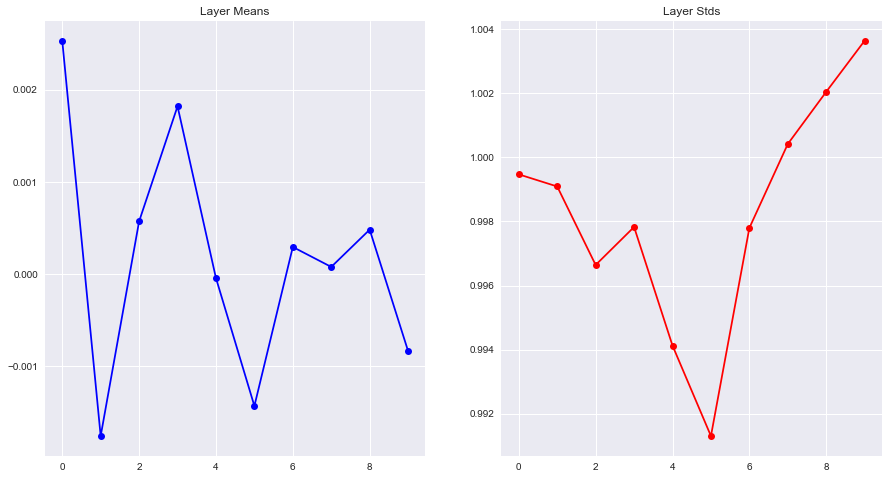

In [13]:
# plot means and stds
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
ax1.plot(list(stats.keys()), layer_means, 'ob-')
ax1.set_title('Layer Means')
ax2.plot(list(stats.keys()), layer_stds, 'or-')
ax2.set_title('Layer Stds')
plt.show()

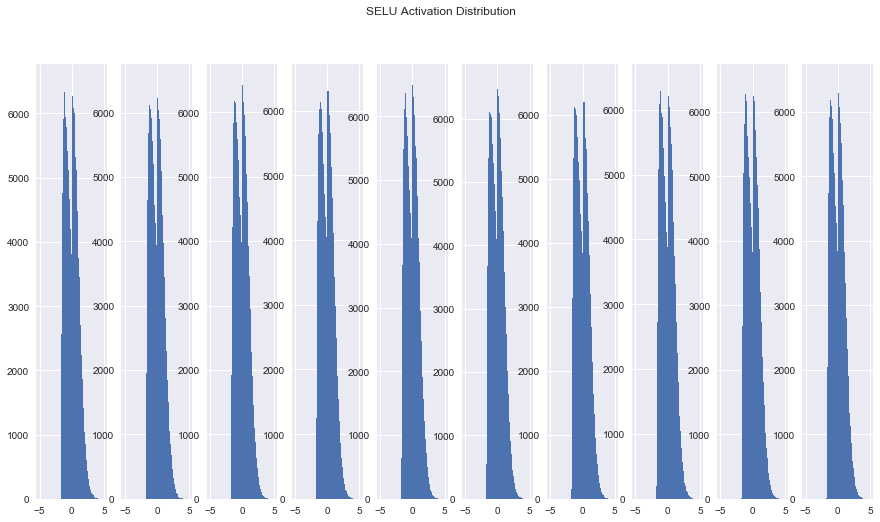

In [14]:
# plot the raw distribution
plt.figure()
for i,s in stats.items():
    plt.subplot(1, num_layers, i+1)
    plt.hist(s.ravel(), 300, range=(-5, 5))
plt.suptitle('SELU Activation Distribution')
plt.savefig(out_dir + 'selu.png', format='png', dpi=200)